# Lets Grow More

<b>Data Science and Analytics Intern

<b>Author: Km Varsha

<b>Task 2: Prediction using Unsupervised Learning

<b>In this task, we will do the Iris Data classification using different classification algorithm.

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('iris.data')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
df.duplicated().values.any()

True

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().values.any()

False

In [11]:
df.shape

(147, 5)

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

Univariate Analysis

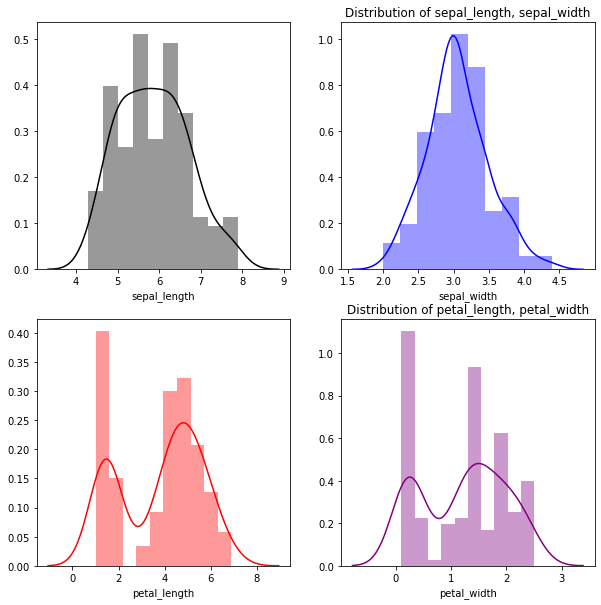

In [14]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplot(221)
sns.distplot(df['sepal_length'],kde=True,color='black',bins=10)
plt.xlabel('sepal_length')

plt.subplot(222)
sns.distplot(df['sepal_width'],kde=True,color='blue',bins=10)
plt.xlabel('sepal_width')

plt.title('Distribution of sepal_length, sepal_width')

plt.subplot(223)
sns.distplot(df['petal_length'],kde=True,color='red',bins=10)
plt.xlabel('petal_length')

plt.subplot(224)
sns.distplot(df['petal_width'],kde=True,color='purple',bins=10)
plt.xlabel('petal_width')

plt.title('Distribution of petal_length, petal_width')
plt.show()

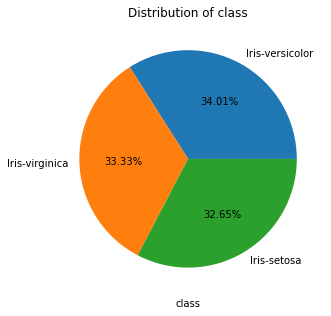

In [15]:
plt.rcParams['figure.figsize'] = (5,5)
plt.subplot()
plt.pie(df['class'].value_counts().values,labels=df['class'].value_counts().index,autopct='%1.2f%%')
plt.xlabel('class')

plt.title('Distribution of class')
plt.show()

Observation:

1-Here variable"Sepal length" and " Sepal width" are approximately following the empirical rule formula, but "petal length"and "petal width" do not, may they have outliers.

2-There are three categories in the dependent variable, which is approximately having equal number of values.

Bivariate Analysis

In [16]:
data = ['sepal_length','sepal_width','petal_length','petal_width']

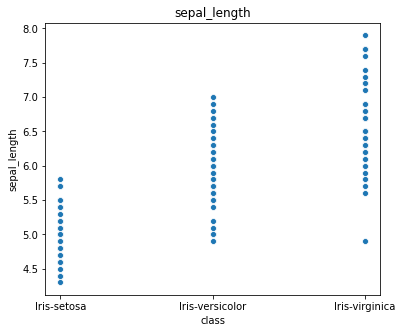

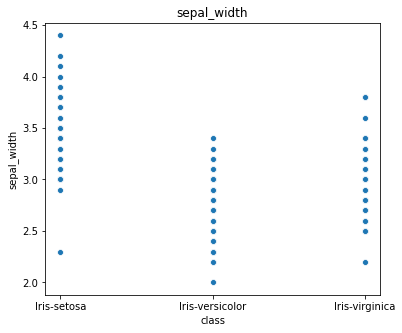

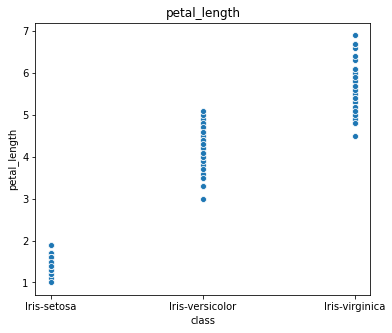

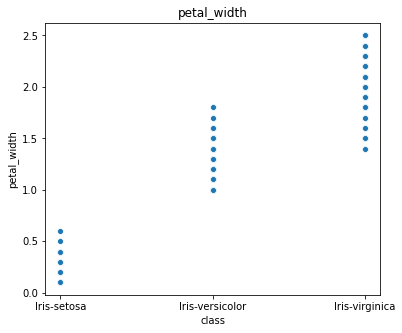

In [17]:
for feature in data:
    plt.rcParams['figure.figsize'] = (6,5)
    sns.scatterplot(x="class",y=feature,data=df, palette="mako")
    plt.xlabel('class')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Observation:
1- Each category of dependent variable falls in a specific range of values of every independent varibles. 

Outliers

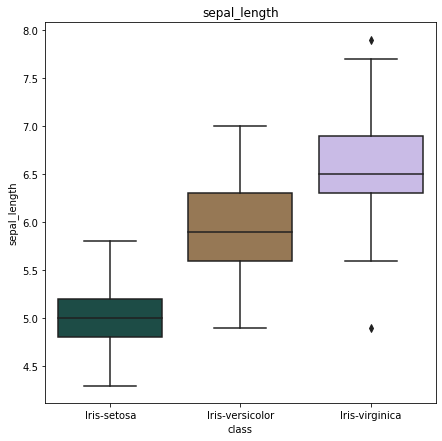

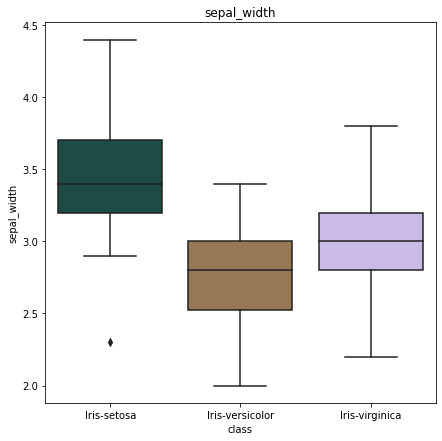

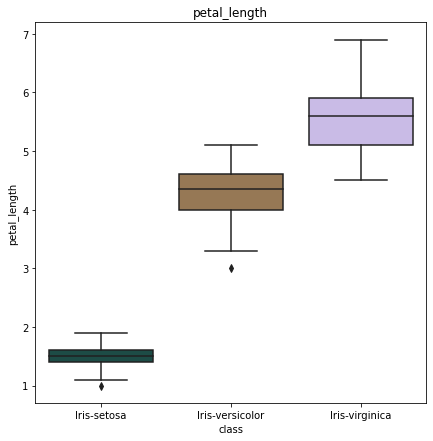

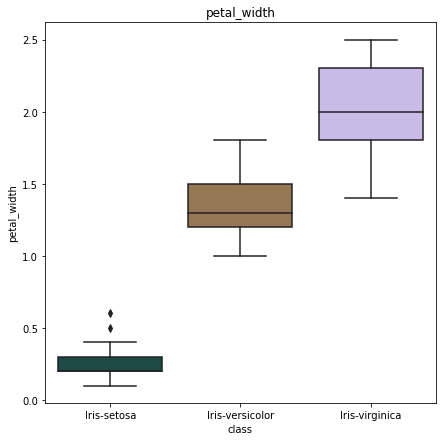

In [18]:
for feature in data:
    
    plt.rcParams['figure.figsize'] = (7,7)
    sns.boxplot(x='class',y=feature,data=df,palette="cubehelix")
    plt.xlabel('class')
    plt.title(feature)
    plt.show()

Observation:
1- As, we can see that here is very less amount of outliers, so we can ignore them.

Multivariate Analysis

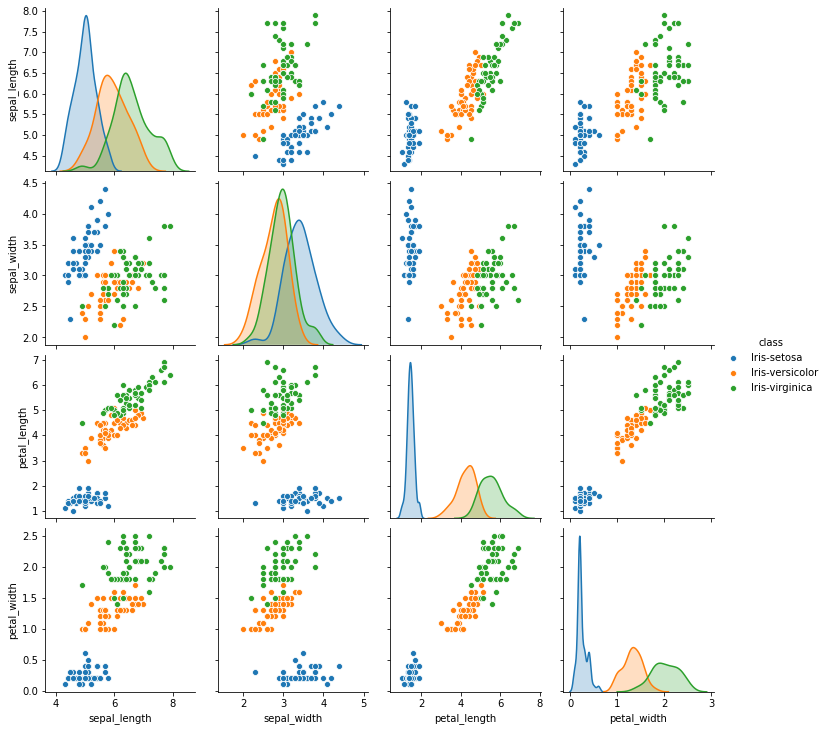

In [19]:
sns.pairplot(df, hue= 'class')

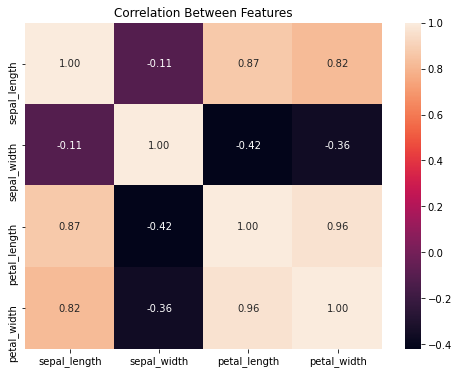

In [20]:
# Correlation
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Between Features")
plt.show()

Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

#for feature in categorical_features:
labelencoder = LabelEncoder()
df["class"] = labelencoder.fit_transform(df["class"].values) 

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

Logistic Regression Classifier

In [24]:
# Build a Logistic Regression Classifier
classifier = LogisticRegression().fit(x_train, y_train)

m1 = classifier.predict(x_test)

[[18  0  0]
 [ 0 12  1]
 [ 0  2 16]]


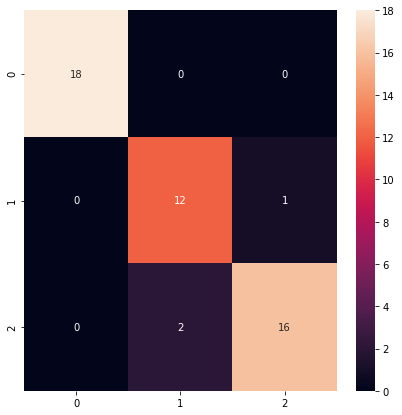

In [25]:
cm1 = confusion_matrix(y_test, m1)
print(cm1)

sns.heatmap(cm1, annot=True);

In [26]:
print(accuracy_score(y_test, m1))

0.9387755102040817


In [27]:
predict = cross_val_predict(estimator = classifier, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.92      0.95      0.93        37
           2       0.93      0.90      0.92        31

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



C:\Users\disha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K Nearest Neighbours Classifier

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

m2 = knn.predict(x_test)

Confusion Matrix:  [[18  0  0]
 [ 0 12  1]
 [ 0  1 17]]


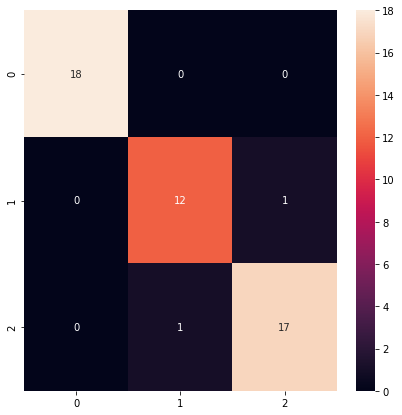

In [29]:
cm2 = confusion_matrix(y_test, m2)
print("Confusion Matrix: ",cm2)

sns.heatmap(cm2, annot=True);

In [30]:
print(accuracy_score(y_test, m2))

0.9591836734693877


In [31]:
predict = cross_val_predict(estimator = knn, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.95      0.97        37
           2       0.94      1.00      0.97        31

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



Random Forest Classifier

In [32]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(x_train, y_train)

m3 = random_forest.predict(x_test)

Confusion Matrix:  [[18  0  0]
 [ 0 12  1]
 [ 0  1 17]]


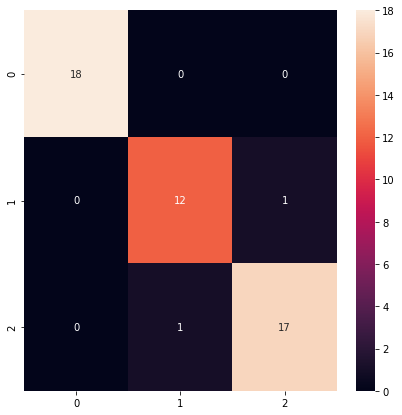

In [33]:
cm3 = confusion_matrix(y_test, m3)
print("Confusion Matrix: ",cm3)

sns.heatmap(cm3, annot=True);

In [34]:
print(accuracy_score(y_test, m3))

0.9591836734693877


In [35]:
predict = cross_val_predict(estimator = knn, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.95      0.97        37
           2       0.94      1.00      0.97        31

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



Gaussian Naive Bayes Classifier

In [36]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

m4 = naive_bayes.predict(x_test)

Confusion Matrix:  [[18  0  0]
 [ 0 13  0]
 [ 0  1 17]]


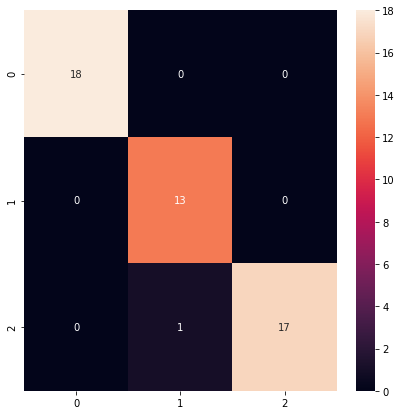

In [37]:
cm4 = confusion_matrix(y_test, m4)
print("Confusion Matrix: ",cm4)

sns.heatmap(cm4, annot=True);

In [38]:
print(accuracy_score(y_test, m4))

0.9795918367346939


In [58]:
predict = cross_val_predict(estimator = naive_bayes, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.91      0.86      0.88        35
           2       0.86      0.91      0.89        34

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



Observation: In all the classification algorithm applied Gaussian Naive Bayes give the best accuracy for the model.